In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/codespace/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [65]:
df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
print(df.shape)
df['Id'] = df.reset_index().index + 1
df = df.head(1000)
print(df.shape)

(1130017, 8)
(1000, 9)


In [66]:
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,Id
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,1
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",2
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,3
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,4
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,5


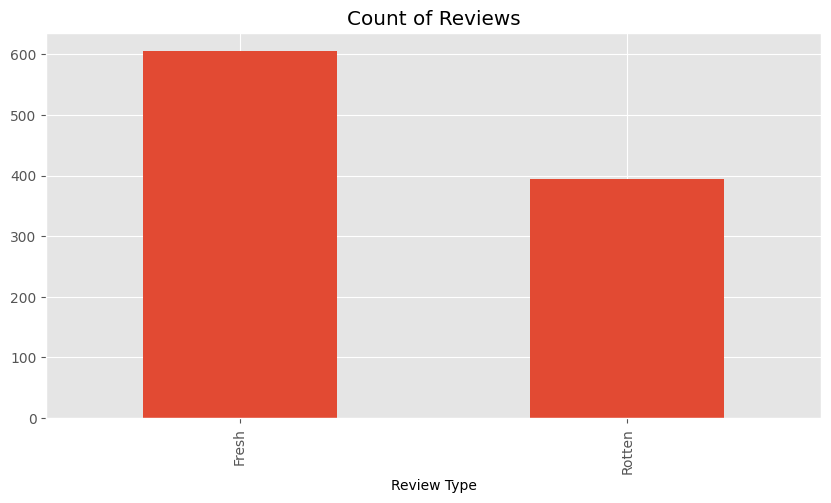

In [67]:
ax = df['review_type'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews',
          figsize=(10, 5))
ax.set_xlabel('Review Type')
plt.show()

In [68]:
example = df['review_content'][50]
print(example)

My problems with it are the same as with most screen adaptations of young adult novels...they spend so much time struggling to explain the world they're creating that they forget which parts of the story people want to see...they figure that people (kids)


In [69]:
tokens = nltk.word_tokenize(example)
tokens[:30]

['My',
 'problems',
 'with',
 'it',
 'are',
 'the',
 'same',
 'as',
 'with',
 'most',
 'screen',
 'adaptations',
 'of',
 'young',
 'adult',
 'novels',
 '...',
 'they',
 'spend',
 'so',
 'much',
 'time',
 'struggling',
 'to',
 'explain',
 'the',
 'world',
 'they',
 "'re",
 'creating']

In [70]:
tagged = nltk.pos_tag(tokens)
tagged[:30]

[('My', 'PRP$'),
 ('problems', 'NNS'),
 ('with', 'IN'),
 ('it', 'PRP'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('as', 'IN'),
 ('with', 'IN'),
 ('most', 'JJS'),
 ('screen', 'JJ'),
 ('adaptations', 'NNS'),
 ('of', 'IN'),
 ('young', 'JJ'),
 ('adult', 'NN'),
 ('novels', 'NNS'),
 ('...', ':'),
 ('they', 'PRP'),
 ('spend', 'VBP'),
 ('so', 'RB'),
 ('much', 'JJ'),
 ('time', 'NN'),
 ('struggling', 'VBG'),
 ('to', 'TO'),
 ('explain', 'VB'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('they', 'PRP'),
 ("'re", 'VBP'),
 ('creating', 'VBG')]

In [71]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  problems/NNS
  with/IN
  it/PRP
  are/VBP
  the/DT
  same/JJ
  as/IN
  with/IN
  most/JJS
  screen/JJ
  adaptations/NNS
  of/IN
  young/JJ
  adult/NN
  novels/NNS
  .../:
  they/PRP
  spend/VBP
  so/RB
  much/JJ
  time/NN
  struggling/VBG
  to/TO
  explain/VB
  the/DT
  world/NN
  they/PRP
  're/VBP
  creating/VBG
  that/IN
  they/PRP
  forget/VBP
  which/WDT
  parts/NNS
  of/IN
  the/DT
  story/NN
  people/NNS
  want/VBP
  to/TO
  see/VB
  .../:
  they/PRP
  figure/VBP
  that/IN
  people/NNS
  (/(
  kids/NNS
  )/))


In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [73]:
sia.polarity_scores(example)

{'neg': 0.156, 'neu': 0.773, 'pos': 0.071, 'compound': -0.6326}

In [74]:
df['review_content'] = df['review_content'].astype(str)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_content']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [75]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [76]:
vaders.head()

,Id,neg,neu,pos,compound,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,1,0.000,0.762,0.238,0.7579,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,2,0.000,1.000,0.000,0.0000,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,3,0.000,0.870,0.130,0.4019,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,4,0.080,0.727,0.193,0.7050,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,5,0.124,0.876,0.000,-0.5267,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


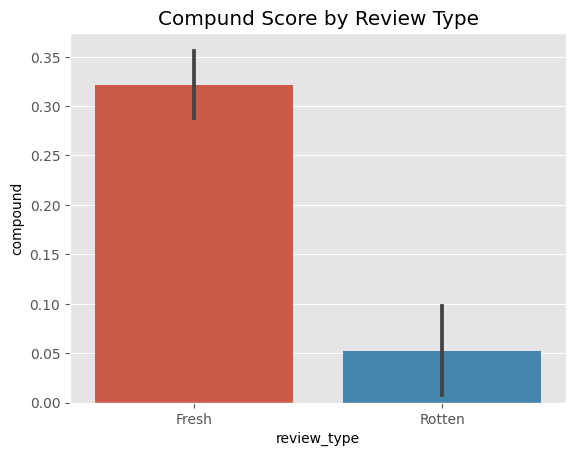

In [77]:
ax = sns.barplot(data=vaders, x='review_type', y='compound')
ax.set_title('Compund Score by Review Type')
plt.show()

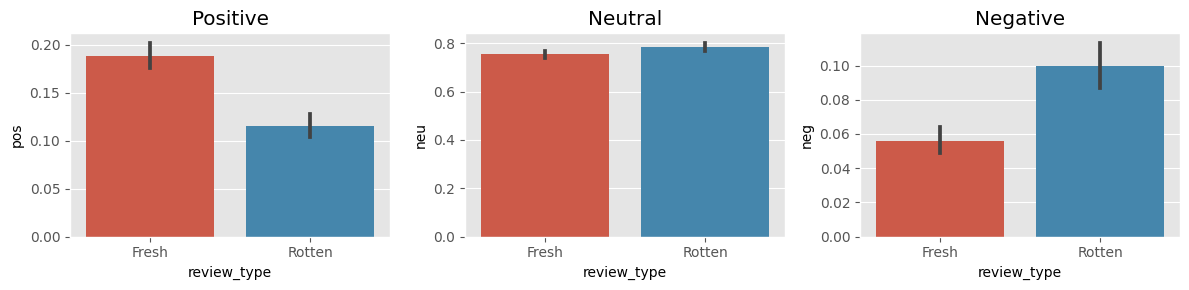

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review_type', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review_type', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review_type', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [82]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [83]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [84]:
print(example)
sia.polarity_scores(example)

My problems with it are the same as with most screen adaptations of young adult novels...they spend so much time struggling to explain the world they're creating that they forget which parts of the story people want to see...they figure that people (kids)


{'neg': 0.156, 'neu': 0.773, 'pos': 0.071, 'compound': -0.6326}

In [85]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.80772406, 'roberta_neu': 0.17579386, 'roberta_pos': 0.016482081}


In [86]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [87]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_content']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [88]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [89]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'rotten_tomatoes_link',
       'critic_name', 'top_critic', 'publisher_name', 'review_type',
       'review_score', 'review_date', 'review_content'],
      dtype='object')

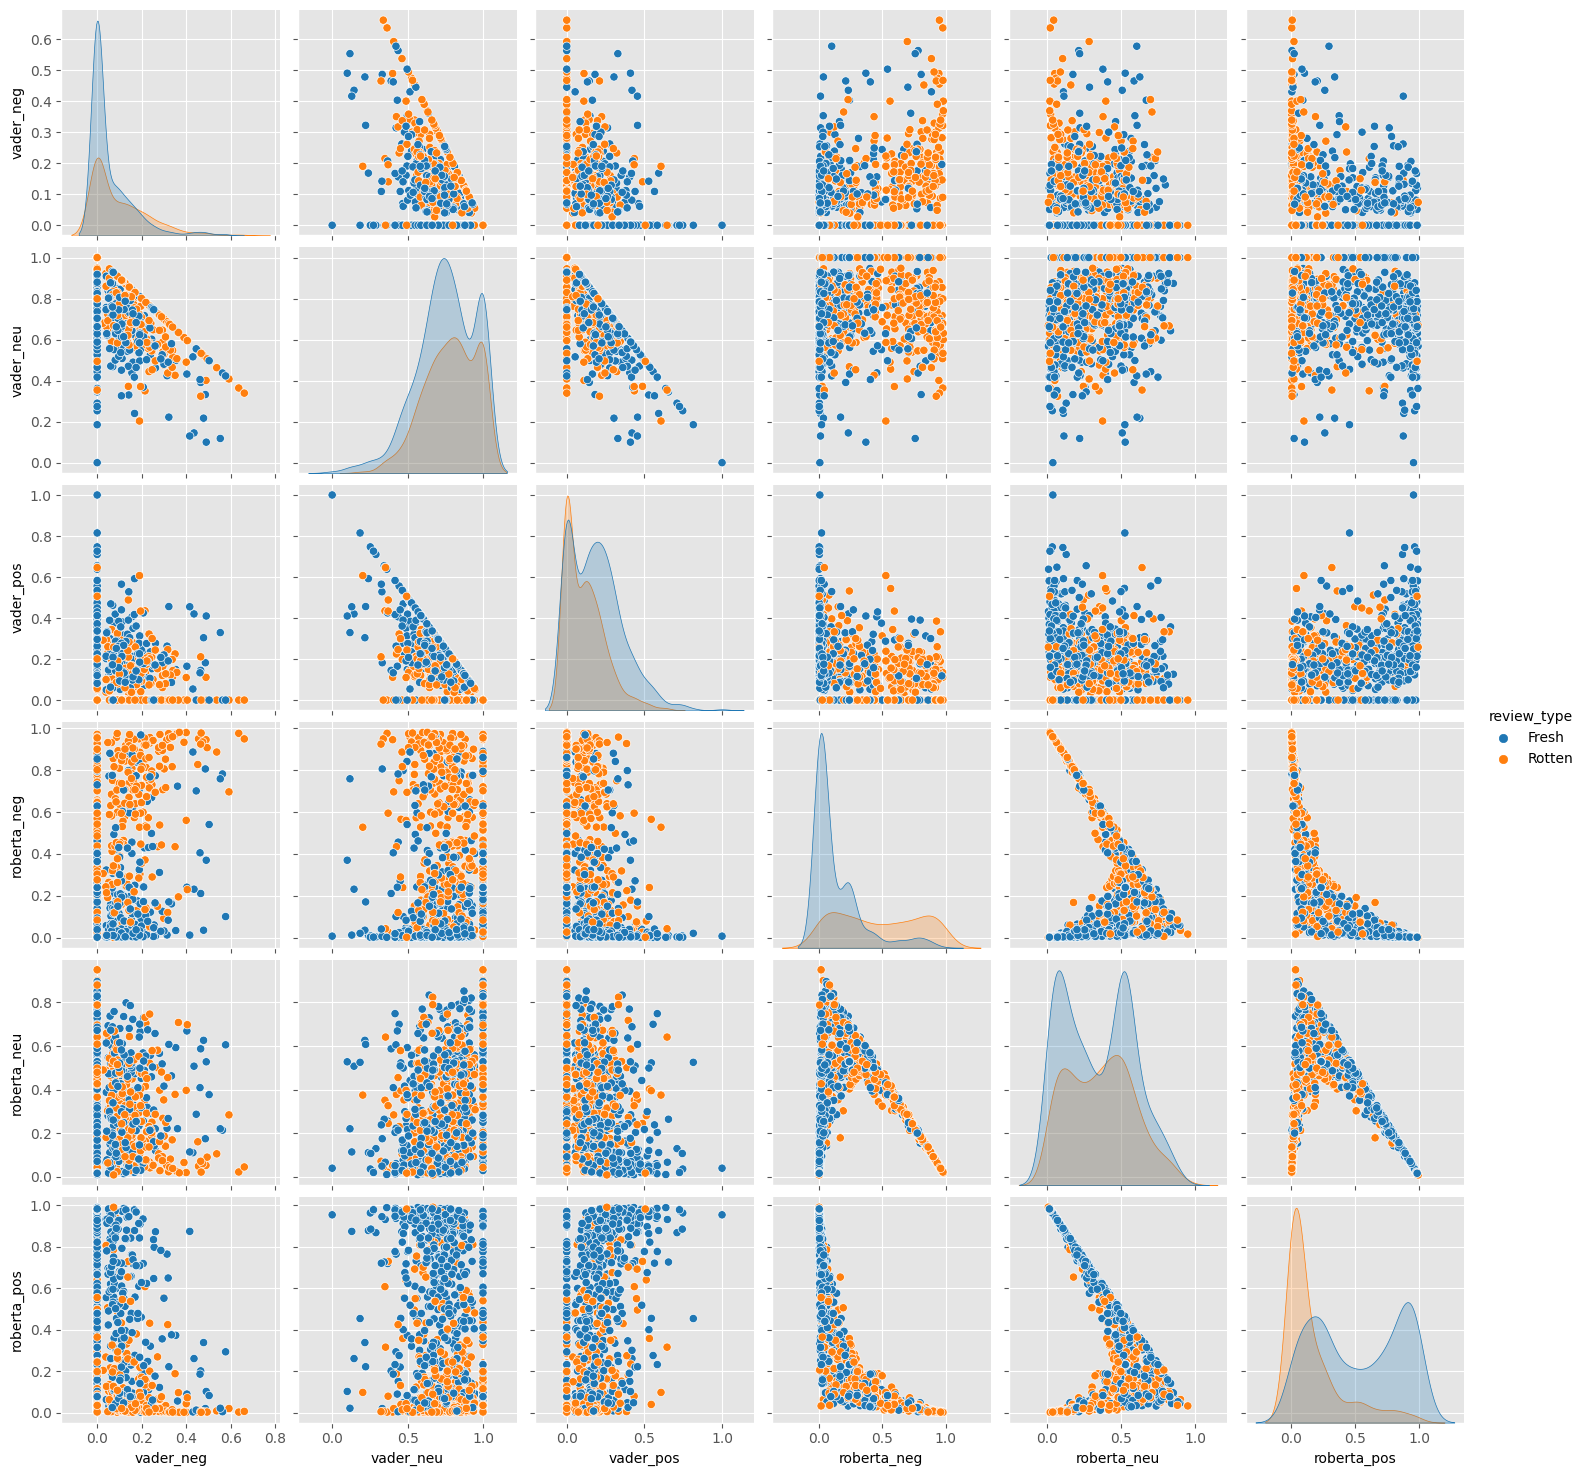

In [91]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review_type',
            palette='tab10')
plt.show()